In [1]:
import sys
sys.path.append("/mnt/nas05/data01/francesco/progetto_simone/ionosphere")
from src.data.dataset import IonoDataset

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.6.0+cu124 with CUDA 1204 (you have 2.6.0+cu118)
    Python  3.10.16 (you have 3.10.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
/mnt/nas05/data01/francesco/progetto_simone/ionosphere/src/vit.py:26: FutureWarning: xformers.components is deprecated and is not maintained anymore. It might be removed in a future version of xFormers 
  import xformers.components.attention.core as xfa


In [2]:
import numpy as np

gen_data = np.load("/mnt/nas05/data01/francesco/progetto_simone/ionosphere/np_generated_data/sample.npy")
org_data = np.load("/mnt/nas05/data01/francesco/progetto_simone/ionosphere/np_generated_data/original.npy")
cond_data = np.load("/mnt/nas05/data01/francesco/progetto_simone/ionosphere/np_generated_data/cond.npy")

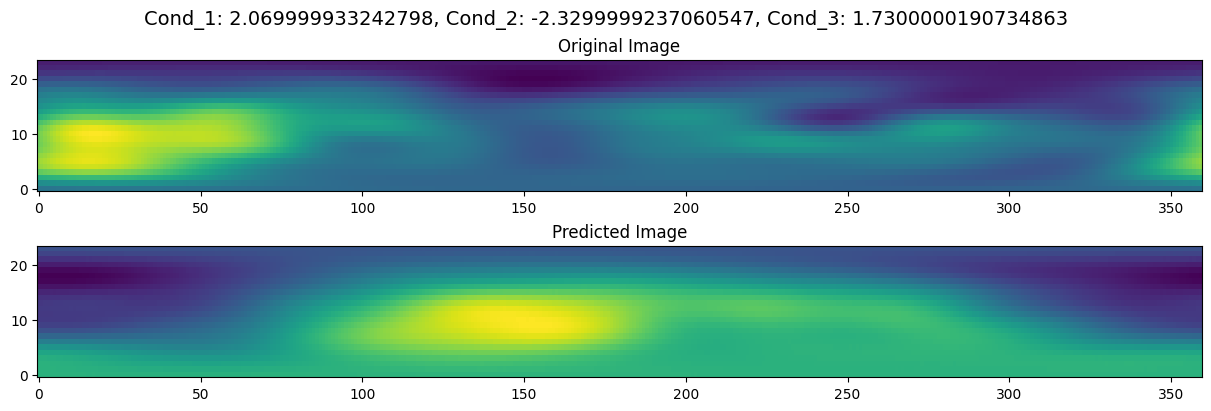

In [7]:
import matplotlib.pyplot as plt 

target_tensor = gen_data[4][0] #
# Use a wide figure to match the (24, 360) data shape
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), constrained_layout=True)

# Plot the original image
ax1.imshow(org_data, origin='lower', aspect='auto')
ax1.set_title('Original Image')

# Plot the predicted image
ax2.imshow(target_tensor, origin='lower', aspect='auto')
ax2.set_title('Predicted Image')

# Add a big title
fig.suptitle('Cond_1: {}, Cond_2: {}, Cond_3: {}'.format(cond_data[0], cond_data[1], cond_data[2]),
             fontsize=14)

plt.show()

In [14]:
import torch

def inverse_normalize(tensor, mean, std):
    mean = torch.tensor(mean, device=tensor.device).view(-1, 1, 1)
    std = torch.tensor(std, device=tensor.device).view(-1, 1, 1)
    return tensor * std + mean

original_data = inverse_normalize(torch.from_numpy(org_data), mean=[-1385.47], std=[7235.46])
predictd_data = inverse_normalize(torch.from_numpy(gen_data), mean=[-1385.47], std=[7235.46])



In [15]:
torch.max(original_data)
torch.min(original_data)
print(f'Diff: {torch.max(original_data) - torch.min(original_data)}')

Diff: 15034.33984375


In [16]:
torch.max(predictd_data)
torch.min(predictd_data)
print(f'Diff: {torch.max(predictd_data) - torch.min(predictd_data)}')

Diff: 57375.68359375


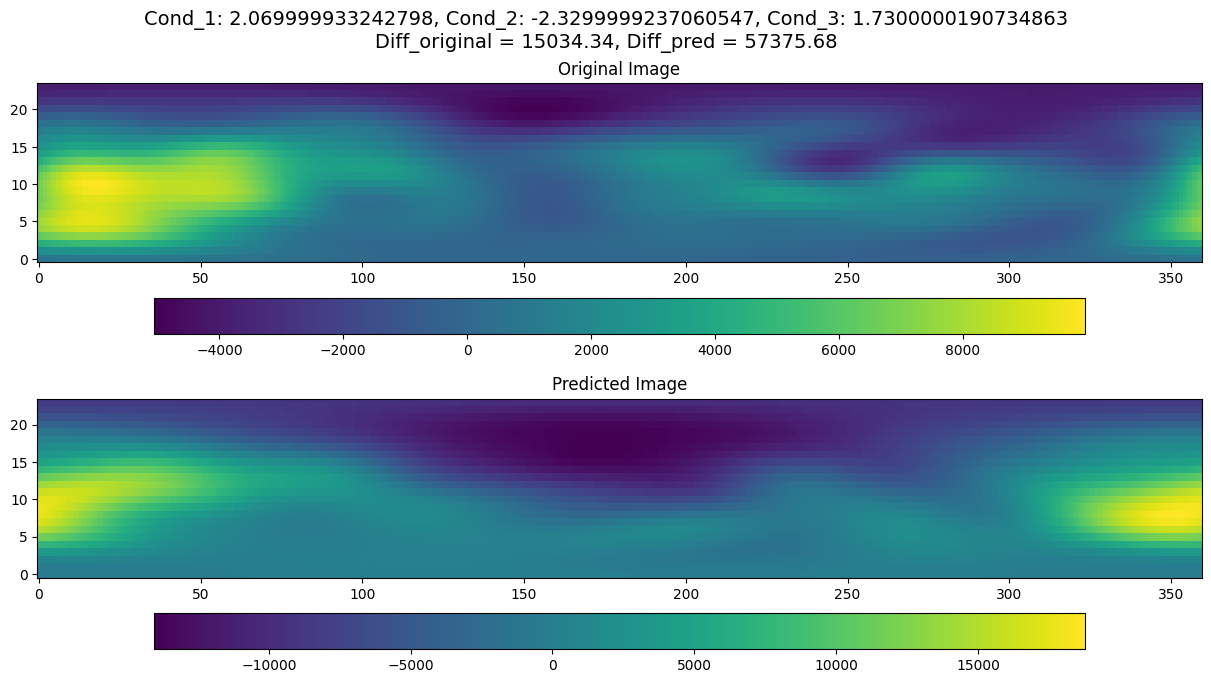

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create figure with vertical stacking
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), constrained_layout=True, gridspec_kw={'hspace': 0.3} )

# Plot the original image
im1 = ax1.imshow(original_data[0].numpy(), origin='lower', aspect='auto')
ax1.set_title('Original Image')

# Add horizontal colorbar under ax1
cax1 = inset_axes(ax1,
                  width="80%",  # width relative to ax1
                  height="20%",  # height in %
                  loc='lower center',
                  bbox_to_anchor=(0, -0.4, 1, 1),
                  bbox_transform=ax1.transAxes,
                  borderpad=0)
plt.colorbar(im1, cax=cax1, orientation='horizontal')

# Plot the predicted image
im2 = ax2.imshow(predictd_data[20][0].numpy(), origin='lower', aspect='auto')
ax2.set_title('Predicted Image')

# Add horizontal colorbar under ax2
cax2 = inset_axes(ax2,
                  width="80%",
                  height="20%",
                  loc='lower center',
                  bbox_to_anchor=(0, -0.4, 1, 1),
                  bbox_transform=ax2.transAxes,
                  borderpad=0)
plt.colorbar(im2, cax=cax2, orientation='horizontal')

# Add a big title
fig.suptitle(
    f'Cond_1: {cond_data[0]}, Cond_2: {cond_data[1]}, Cond_3: {cond_data[2]}\n'
    f'Diff_original = {torch.max(original_data) - torch.min(original_data):.2f}, '
    f'Diff_pred = {torch.max(predictd_data) - torch.min(predictd_data):.2f}',
    fontsize=14
)

plt.show()

